In [1]:
import pandas as pd 
import re
import matplotlib.pyplot as plt
fb1=pd.read_csv('nysu_10902_2019立委_research.csv')
fb2=pd.read_csv('nysu_10902_2019_research_right.csv')
fba=pd.merge(fb1,fb2,how="outer")
fb3=pd.read_csv('nysu_10902_2019立委_research_補.csv')
fb4=pd.read_csv('nysu_10902_2019立委_research_補2.csv')
fbb=pd.merge(fb3,fb4,how="outer")

In [2]:
fb=pd.merge(fba,fbb,how="outer")
politics = pd.read_csv('9th_legislator_promise.csv')

以臺北市第八選舉區立委賴士葆為例，依照月份來統計數值資料的變化

In [3]:
fb.head(1)

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
0,244784245612709_2052039854887130,244784245612709,陳學聖,政治人物,鑒於中油觀塘案在環評大會迅速通關，原先專案小組考量對藻礁生態有重大影響，建議退回目的事業主管...,NaN,photo,https://www.facebook.com/244784245612709/posts...,2019-01-15T11:00:16+0000,2019-01-15T19:00:16,...,NaN,NaN,144,0,0,0,0,0,6,5


In [4]:
#政見 有哪些立委
politics['姓名'].unique()

array(['吳思瑤', '姚文智', '何志偉', '蔣萬安', '李彥秀', '林昶佐', '蔣乃辛', '費鴻泰', '賴士葆',
       '呂 孫 綾', '林 淑 芬', '高志鵬', '余天', '吳 秉 叡', '蘇 巧 慧', '張 宏 陸', '羅 致 政',
       '江 永 昌', '林 德 福', '吳 琪 銘', '羅 明 才', '黃 國 昌', '蔡適應', '鄭 運 鵬',
       '陳賴素美', '陳學聖', '鄭寶清', '呂玉玲', '趙正宇', '林為洲', '柯建銘', '陳超明', '徐志榮',
       '蔡其昌', '顏寬恒', '洪慈庸', '張廖萬堅', '盧秀燕', '沈智慧', '黃國書', '何欣純', '江啟臣',
       '王惠美', '柯呈枋', '黃秀芳', '洪宗熠', '陳素月', '馬 文 君', '許 淑 華', '蘇 治 芬',
       '劉 建 國', '李 俊 俋', '蔡 易 餘', '陳 明 文', '葉宜津', '黃偉哲', '郭國文  ', '陳亭妃',
       '林俊憲', '王定宇', '邱 議 瑩', '邱 志 偉', '劉 世 芳', '林 岱 樺', '管 碧 玲', '李 昆 澤',
       '趙 天 麟', '馬 凱 妮', '賴 瑞 隆', '蘇震清', '鍾佳濱', '莊瑞雄', '陳歐珀', '蕭美琴',
       '劉櫂豪', '楊 曜', '楊鎮浯', '陳玉珍', '陳雪生', '廖國棟', '鄭天財', '陳瑩', '高金素梅',
       '簡東明', '孔文吉', nan], dtype=object)

In [5]:
#fb 總共有哪些立委
fb['page_name'].unique()

array(['陳學聖', '陳明文', '蔡其昌', '趙天麟', '許淑華', '林昶佐 Freddy Lim', '蔡適應', '葉宜津',
       '蘇震清', '李昆澤', '柯呈枋', '陳亭妃', '顏寬恒', '陳賴素美 粉絲團', '呂孫綾', '立法委員 江永昌',
       '徐志榮', '陳玉珍 珍愛金門', '沈智慧', '賴瑞隆', '趙正宇', '蕭美琴 Bi-khim Hsiao', '洪慈庸',
       '管碧玲 (kuanbiling)', '李俊俋', '吳琪銘', '吳思瑤', '林岱樺', '江啟臣', '鄭寶清',
       '賴士葆', '邱志偉', '蘇巧慧', '黃秀芳', '王定宇', '張宏陸', '堅持．張廖萬堅', '李彥秀', '林德福',
       '黃國昌', '林淑芬', '立法委員林為洲', '蔡易餘 家己人', '愛信任-劉世芳', '高雄小金剛許智傑', '蘇治芬',
       '羅致政粉絲團', '羅明才', '劉建國', '何欣純', '立法委員 呂玉玲', '黃國書', '吳秉叡', '劉櫂豪',
       '柯建銘', '莊瑞雄', '楊曜Yangyao', '郭國文', '洪宗熠-熠起更好', '陳歐珀', '林俊憲', '蔣萬安',
       '立法委員 馬文君', '鍾佳濱', '費鴻泰（阿力克司）', '何志偉', '余天 Yu Tian', '陳素月SayYes',
       '陳超明-阿明哥粉絲團'], dtype=object)

In [6]:
lai = fb[fb.page_name == "賴士葆"]
# 把時間格式轉換
lai['new_date'] = pd.to_datetime(lai['created_time_taipei']).dt.date
lai['post_hour'] = pd.to_datetime(lai['created_time_taipei']).dt.hour #找出發文 '時間'(hour)
lai['month_year'] = pd.to_datetime(lai['new_date']).dt.to_period('M')
lai.head(1)

<ipython-input-6-fb574f01af63>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lai['new_date'] = pd.to_datetime(lai['created_time_taipei']).dt.date
<ipython-input-6-fb574f01af63>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lai['post_hour'] = pd.to_datetime(lai['created_time_taipei']).dt.hour #找出發文 '時間'(hour)
<ipython-input-6-fb574f01af63>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
16510,1573873889493647_2261214444092918,1573873889493647,賴士葆,公眾人物,蔡英文昨天首度透露決策過程，表示她不同意管中閔上台的立場，她說行政院在事後檢討過程時還討論可...,NaN,link,https://www.facebook.com/1573873889493647/post...,2019-01-15T08:22:23+0000,2019-01-15T16:22:23,...,0,0,0,0,0,133,93,2019-01-15,16,2019-01


In [7]:
#發文時間分佈
post_time = lai[['post_id','post_hour']].groupby('post_hour').count()
post_time.index.name = 'post_hour'
post_time.reset_index(inplace = True)
post_time

,post_hour,post_id
0,0,2
1,4,2
2,5,1
3,6,16
4,7,23
5,8,27
6,9,141
7,10,69
8,11,43
9,12,27


In [8]:
lai[lai.created_time_taipei == max(lai.created_time_taipei)]
#找出時間最晚的貼文

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
17156,1573873889493647_1323852671153217,1573873889493647,賴士葆,公眾人物,興旺里掃街拜票,賴士葆的直播影片。,video,https://www.facebook.com/1573873889493647/vide...,2019-12-26T11:02:56+0000,2019-12-26T19:02:56,...,0,0,0,0,0,63,21,2019-12-26,19,2019-12


In [9]:
lai[lai.created_time_taipei == min(lai.created_time_taipei)]
#找出時間最早的貼文

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
16524,1573873889493647_2253063558241340,1573873889493647,賴士葆,公眾人物,「世代交替」引發熱議，不知道世代交替是真議題還是假議題，不知道是要規範立法委員還是總統候選人...,NaN,link,https://www.facebook.com/1573873889493647/post...,2019-01-02T04:46:09+0000,2019-01-02T12:46:09,...,0,0,0,0,0,59,8,2019-01-02,12,2019-01


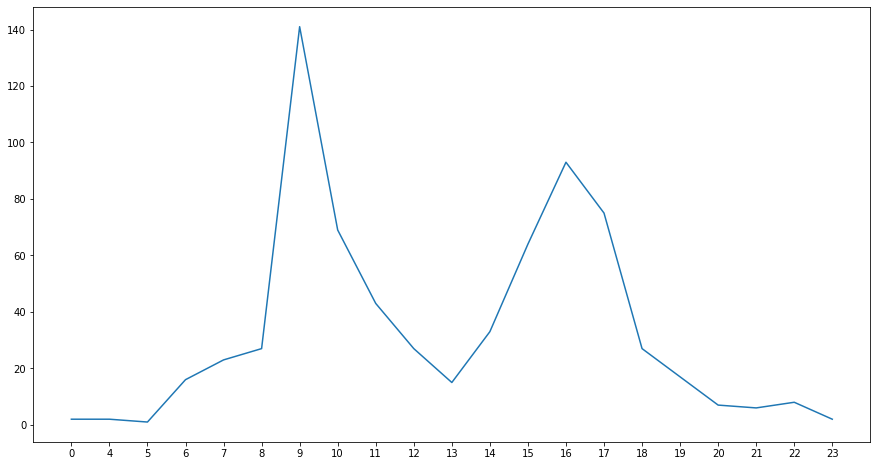

In [10]:
#畫出整年貼文分佈
labels = post_time['post_hour'].map(str)


fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
ax.plot(labels, post_time['post_id'])

plt.show()

In [11]:
#整年貼文數量分佈
whole_year = lai[['post_id','month_year']].groupby('month_year').count()
whole_year.index.name = 'month_year'
whole_year.reset_index(inplace=True)
whole_year

,month_year,post_id
0,2019-01,39
1,2019-02,29
2,2019-03,56
3,2019-04,68
4,2019-05,48
5,2019-06,39
6,2019-07,42
7,2019-08,64
8,2019-09,69
9,2019-10,89


In [12]:
#每個月平均發文數量統計值
whole_year.describe()

,post_id
count,12.000000
mean,58.166667
std,18.977658
min,29.000000
25%,41.250000
50%,60.000000
75%,69.750000
max,89.000000


In [13]:
results = lai.groupby('month_year').sum()
results

,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
month_year,,,,,,,,,,
2019-01,61381081690252264,23422,0,0,0,0,0,2341,2793,510
2019-02,45642342795315784,22893,0,0,0,0,0,5966,2435,410
2019-03,88136937811644272,91546,0,0,0,0,0,16540,9047,778
2019-04,107023424485568048,90907,0,0,0,0,0,13482,5241,874
2019-05,75545946695695088,65554,0,0,0,0,0,14252,5419,633
2019-06,61381081690252264,72910,0,0,0,0,0,6327,5118,538
2019-07,66102703358733208,120158,0,0,0,0,0,14637,7623,535
2019-08,100727928927593456,134039,0,0,0,0,0,11834,8819,816
2019-09,108597298375061696,179056,0,0,0,0,0,12999,9825,848


In [14]:
results.index.name = 'newhead' #將上行定義出的results索引標籤命名為newhead
results.reset_index(inplace=True)#將被重新命名過的索引標籤回復成系統本來的排列，個人覺得意義不大
results

,newhead,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
0,2019-01,61381081690252264,23422,0,0,0,0,0,2341,2793,510
1,2019-02,45642342795315784,22893,0,0,0,0,0,5966,2435,410
2,2019-03,88136937811644272,91546,0,0,0,0,0,16540,9047,778
3,2019-04,107023424485568048,90907,0,0,0,0,0,13482,5241,874
4,2019-05,75545946695695088,65554,0,0,0,0,0,14252,5419,633
5,2019-06,61381081690252264,72910,0,0,0,0,0,6327,5118,538
6,2019-07,66102703358733208,120158,0,0,0,0,0,14637,7623,535
7,2019-08,100727928927593456,134039,0,0,0,0,0,11834,8819,816
8,2019-09,108597298375061696,179056,0,0,0,0,0,12999,9825,848
9,2019-10,140074776164934656,168091,0,0,0,0,0,11691,10334,1059


In [15]:
results['newhead'].map(str)#將索引標籤newhead那欄中所有資料轉為字串格式

0     2019-01
1     2019-02
2     2019-03
3     2019-04
4     2019-05
5     2019-06
6     2019-07
7     2019-08
8     2019-09
9     2019-10
10    2019-11
11    2019-12
Name: newhead, dtype: object

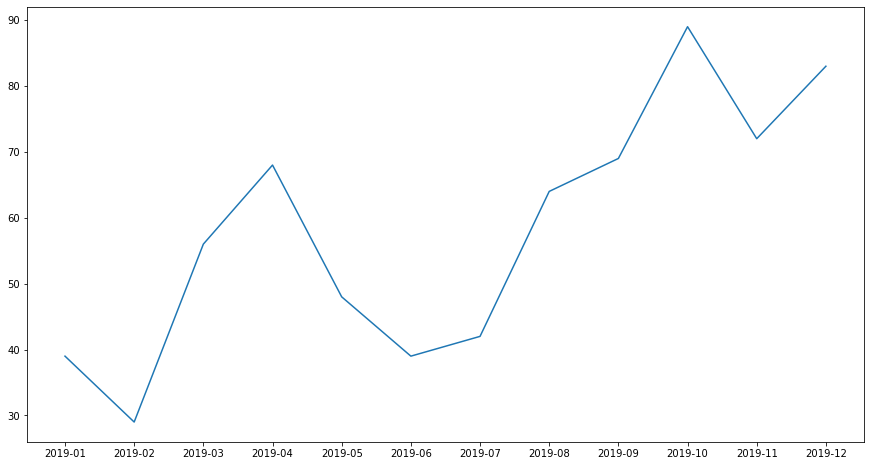

In [16]:
#畫出整年貼文分佈
labels = results['newhead'].map(str)


fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
ax.plot(labels, whole_year['post_id'])

plt.show()

In [17]:
# 每個月的按讚、評論、分享總數 分佈
results = lai.groupby('month_year').sum()
results.index.name = 'newhead'
results.reset_index(inplace=True)
results

,newhead,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
0,2019-01,61381081690252264,23422,0,0,0,0,0,2341,2793,510
1,2019-02,45642342795315784,22893,0,0,0,0,0,5966,2435,410
2,2019-03,88136937811644272,91546,0,0,0,0,0,16540,9047,778
3,2019-04,107023424485568048,90907,0,0,0,0,0,13482,5241,874
4,2019-05,75545946695695088,65554,0,0,0,0,0,14252,5419,633
5,2019-06,61381081690252264,72910,0,0,0,0,0,6327,5118,538
6,2019-07,66102703358733208,120158,0,0,0,0,0,14637,7623,535
7,2019-08,100727928927593456,134039,0,0,0,0,0,11834,8819,816
8,2019-09,108597298375061696,179056,0,0,0,0,0,12999,9825,848
9,2019-10,140074776164934656,168091,0,0,0,0,0,11691,10334,1059


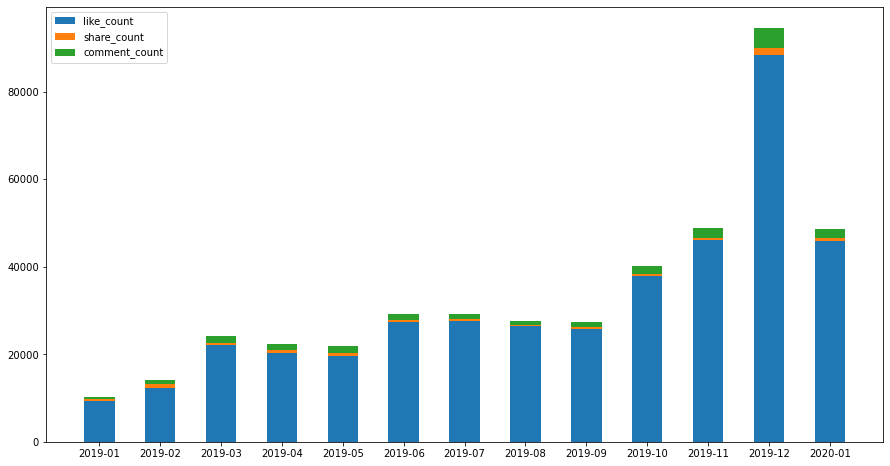

In [19]:
#整年按讚、評論、分享數

labels = results['newhead'].map(str)
width = 0.5       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax.bar(labels, results['like_count'], width, label='like_count')
ax.bar(labels, results['share_count'], width, label='share_count', bottom=results['like_count'])
ax.bar(labels, results['comment_count'], width, label='comment_count', bottom=results['share_count']+results['like_count'])
#ax.plot(labels, whole_year['post_id'])

ax.legend()
plt.show()

In [18]:
#找出評論數量的統計值
lai['comment_count'].describe()

count     698.000000
mean      190.746418
std       310.084896
min         4.000000
25%        65.250000
50%       120.500000
75%       217.000000
max      4530.000000
Name: comment_count, dtype: float64

In [19]:
#找出按讚數量的統計值
lai['like_count'].describe()

count      698.000000
mean      1993.176218
std       1899.772324
min         21.000000
25%        818.750000
50%       1451.000000
75%       2432.250000
max      17728.000000
Name: like_count, dtype: float64

In [20]:
# 很明顯12月按讚、分享、評論數衝高，因此找出12月的資料
high = lai[lai.month_year == "2019-12"]
results_high = high.groupby('new_date').sum()
results_high.index.name = 'newhead' #更改欄位名稱
results_high.reset_index(inplace=True)
results_high

,newhead,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
0,2019-12-01,4721621668480941,10255,0,0,0,0,0,530,532,49
1,2019-12-02,3147747778987294,3600,0,0,0,0,0,276,464,25
2,2019-12-03,6295495557974588,18131,0,0,0,0,0,1827,1062,51
3,2019-12-04,4721621668480941,6941,0,0,0,0,0,645,391,36
4,2019-12-05,4721621668480941,8234,0,0,0,0,0,629,639,31
5,2019-12-06,4721621668480941,7674,0,0,0,0,0,565,468,35
6,2019-12-07,1573873889493647,3130,0,0,0,0,0,235,226,7
7,2019-12-08,4721621668480941,7812,0,0,0,0,0,379,223,39
8,2019-12-09,4721621668480941,5378,0,0,0,0,0,334,700,50
9,2019-12-10,4721621668480941,10852,0,0,0,0,0,657,534,30


No handles with labels found to put in legend.


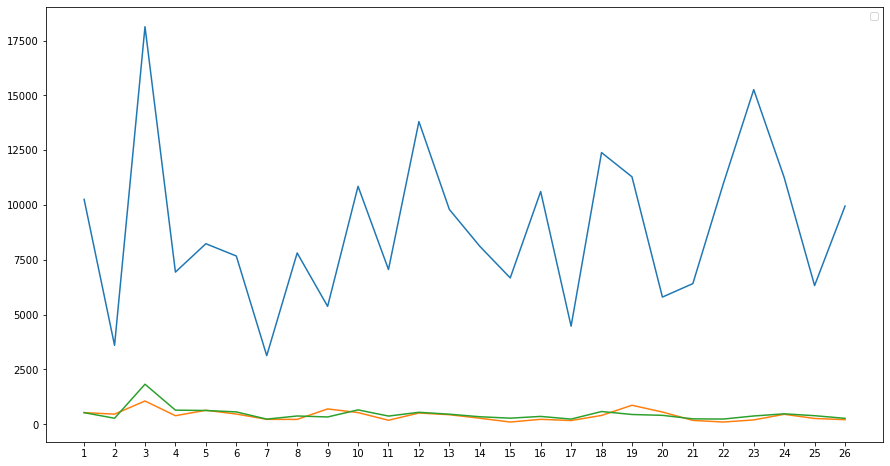

In [21]:
#畫圖 看整個月按讚、分享、評論的流量
labels = [str(i) for i in range(1,27)]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax.plot(labels, results_high['like_count'])
ax.plot(labels, results_high['share_count'])
ax.plot(labels, results_high['comment_count'])

ax.legend()

plt.show()

In [22]:
#12/3、12、18號很明顯按讚較高  因此找出這天的文章
lai['new_date']=lai['new_date'].map(str) # turn 'new_date' into str
Dec_03 = lai[lai['new_date'] == "2019-12-03"]
Dec_03[['message','comment_count', 'like_count']].replace(r'\n', ' ', regex = True)

<ipython-input-22-c1993c0c3d0e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lai['new_date']=lai['new_date'].map(str) # turn 'new_date' into str


,message,comment_count,like_count
17138,謝長廷擔任駐日代表以來，從來沒有出現正面的新聞，負面的新聞卻是一堆。謝長廷有很多次機會可以自...,302,6430
17139,外交部吳部長不理會外面群眾的抗議，居然還要警衛把我擋在電梯𥚃面，不讓我上去找部長！,1017,4272
17140,貧富差距連網軍界都大得嚇人，有的可以拿標案領1450萬，有人卻只能固定月領一萬？ #助日代表...,99,1731
17141,『1458逼死大阪處長，蔡英文謝長廷沒責任？』記者會,409,5698


In [23]:
#12/3、12、18號很明顯按讚較高  因此找出這天的文章
lai['new_date']=lai['new_date'].map(str) # turn 'new_date' into str
Dec_12 = lai[lai['new_date'] == "2019-12-12"]
Dec_12[['message','comment_count', 'like_count']].replace(r'\n', ' ', regex = True)

<ipython-input-23-58319a3716de>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lai['new_date']=lai['new_date'].map(str) # turn 'new_date' into str


,message,comment_count,like_count
17203,興泰里拜票,56,1681
17204,謝長廷其實不必用臉書來噴口水說他多委屈，現在火速趕快去訂機票回台灣面對民意，下星期一最後一次...,116,833
17205,感謝朱立倫主委蒞臨競選總部為我們打氣！,105,3640
17206,要求金管會對於未來銀行開放手機門號可辦信用卡及信貸等業務，要嚴格控管風險，以避免2004卡債...,63,1536
17207,網軍東廠之事迄今蔡政府只會切割閃躲，還沒給人民清楚交待！,207,6113


In [24]:
#12/3、12、18號很明顯按讚較高  因此找出這天的文章
lai['new_date']=lai['new_date'].map(str) # turn 'new_date' into str
Dec_18 = lai[lai['new_date'] == "2019-12-18"]
Dec_18[['message','comment_count', 'like_count']].replace(r'\n', ' ', regex = True)

<ipython-input-24-f7a4efb016aa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lai['new_date']=lai['new_date'].map(str) # turn 'new_date' into str


,message,comment_count,like_count
17183,中正區頂東里拜票,60,1788
17184,NaN,6,28
17185,旗開得勝，六六大順！,207,4291
17186,NaN,135,3989
17187,反滲透法就是刑法100條復僻，任何與大陸交流的台商、台生、民間團體可能由政府認定違法而被刑罰...,174,2295


In [25]:
#按讚次數最多的貼文 
mostlike_10 = lai.sort_values(by = ['like_count'],ascending = False).head(10)
mostlike_10[['message','like_count','month_year']].replace(r'\n',' ',regex=True)

,message,like_count,month_year
17093,韓國瑜、賴士葆聯合兢選總部將於11月30日(星期六)上午成立，八點半開始進場，歡迎大家蒞臨指...,17728,2019-11
16825,請大家都來動員支持韓國瑜參選總統並羸得最後勝利！,15618,2019-07
16621,「將阿扁關回中監」木新市場聯署,12125,2019-03
16611,將阿扁關回去，大家一起來連署! 動動手指頭點下去 👉 http://abao.tw/ab/...,11096,2019-03
16776,民進黨真的是「權力中毒」！,10494,2019-06
16960,NaN,10410,2019-09
16829,力挺韓國瑜以訟止謗,9771,2019-08
17147,今天賴士葆競選總部成立，陽光普照，很多貴賓及 4千多位支持賴士葆的好朋友來到現場加油打氣，三...,9661,2019-11
16795,參加凱道反對蔡英文没收公投活動,9474,2019-07
16872,美國AIT處長酈英傑訪韓，蔡英文抓狂？,9275,2019-08


In [26]:
#最多讚數前10的文章的 種類 video / photo?
mostlike_10 = lai.sort_values(by = ['like_count'],ascending=False).head(10)
mostlike_10.groupby('type').count()

,post_id,page_id,page_name,page_category,message,story,permalink,created_time_gmt,created_time_taipei,link_url,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
type,,,,,,,,,,,,,,,,,,,,,
photo,5,5,5,5,4,0,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
video,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5


In [27]:
# 比較、查看他政見
promise = politics[politics.姓名 == "賴士葆"].政見.to_string()
re.split('。 |：', promise) # skip this, just to make it easier to read

['8    1.在九二共識、一中各表的基礎下，推動兩岸和平發展 2.推動內閣制、恢復閣揆同意權 3.推動...']

1. 曝光度高的貼文總統帶小雞
2. 批扁、批英、批DPP聲量
3. 藍大於綠結構選區